### Video Games Sales Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv(r'C:\Users\aungsawpyae\Documents\data_visualization\datasets\vgchartz-2024.csv')

In [3]:
df.shape

(64016, 14)

df.isna().sum()

#### Data Cleaning

In [4]:
#deleting unwanted column
df.drop(columns=['img'],inplace=True)

In [5]:
#checking null values
df.isna().sum()

title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         64016 non-null  object 
 1   console       64016 non-null  object 
 2   genre         64016 non-null  object 
 3   publisher     64016 non-null  object 
 4   developer     63999 non-null  object 
 5   critic_score  6678 non-null   float64
 6   total_sales   18922 non-null  float64
 7   na_sales      12637 non-null  float64
 8   jp_sales      6726 non-null   float64
 9   pal_sales     12824 non-null  float64
 10  other_sales   15128 non-null  float64
 11  release_date  56965 non-null  object 
 12  last_update   17879 non-null  object 
dtypes: float64(6), object(7)
memory usage: 6.3+ MB


##### Handling Null Values from Numeric Datatype

In [7]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['critic_score',
 'total_sales',
 'na_sales',
 'jp_sales',
 'pal_sales',
 'other_sales']

In [8]:
#imputation
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

#### Converting Datatype of Date Columns

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

#### Handling Missing Values from Datetime Columns

In [10]:
df['release_date'].fillna(df['release_date'].median(),inplace=True)
df['last_update'].fillna(df['last_update'].median(),inplace=True)

#### Handling Missing Values from Object Columns

In [11]:
df.dropna(inplace=True)

### EDA

#### 1.Which titles sold the most worldwide?

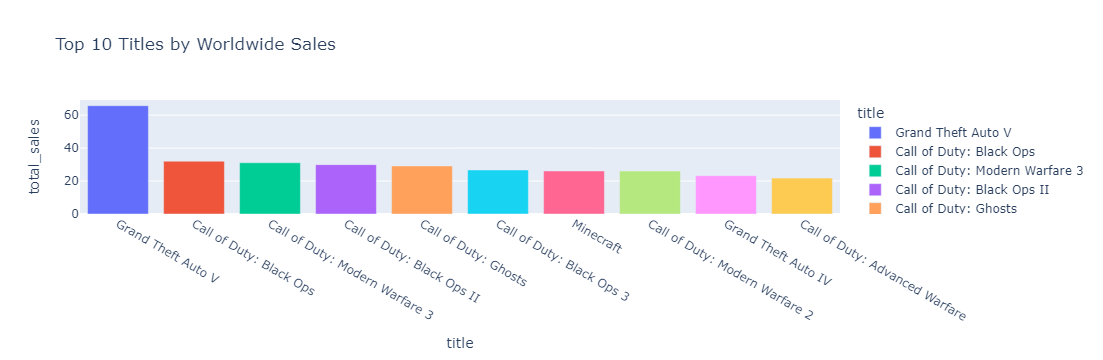

In [29]:
sales_by_title_sort = df.groupby('title')['total_sales'].sum().reset_index().sort_values('total_sales',ascending=False)
px.bar(sales_by_title_sort.head(10),x='title',y='total_sales',title='Top 10 Titles by Worldwide Sales',color='title')

****Conclusion 1 : The title 'Grand Theft Auto V' has the most highest sales worldwide.****

#### 2.Which year had the highest sales? Has the industry grown over time?

In [15]:
df['release_year'] = df['release_date'].dt.year

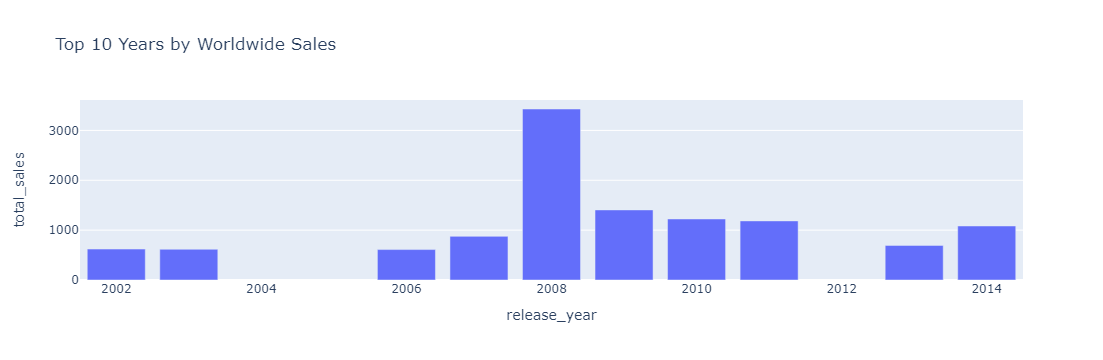

In [31]:
sales_by_year = df.groupby('release_year')['total_sales'].sum().reset_index()
sales_by_year_sort = df.groupby('release_year')['total_sales'].sum().reset_index().sort_values('total_sales',ascending=False)
px.bar(sales_by_year_sort.head(10),x='release_year',y='total_sales',title='Top 10 Years by Worldwide Sales')

****Conclusion 2.1 : The year 2008 has the highest sales worldwide followed by 2009.****

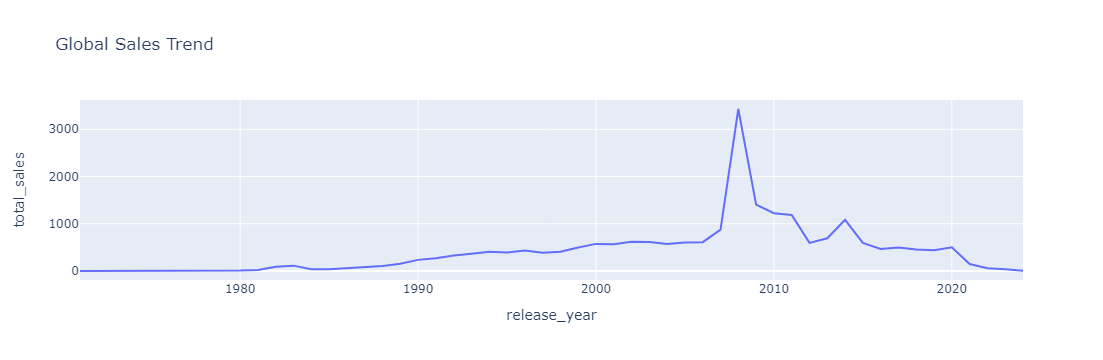

In [34]:
px.line(sales_by_year,x='release_year',y='total_sales',title='Global Sales Trend')

****Conclusion 2.2 : The industry has grown around 2008 year but currently the progress is constant.****

#### 3.Do any consloes seem to specialize in a particular genre?

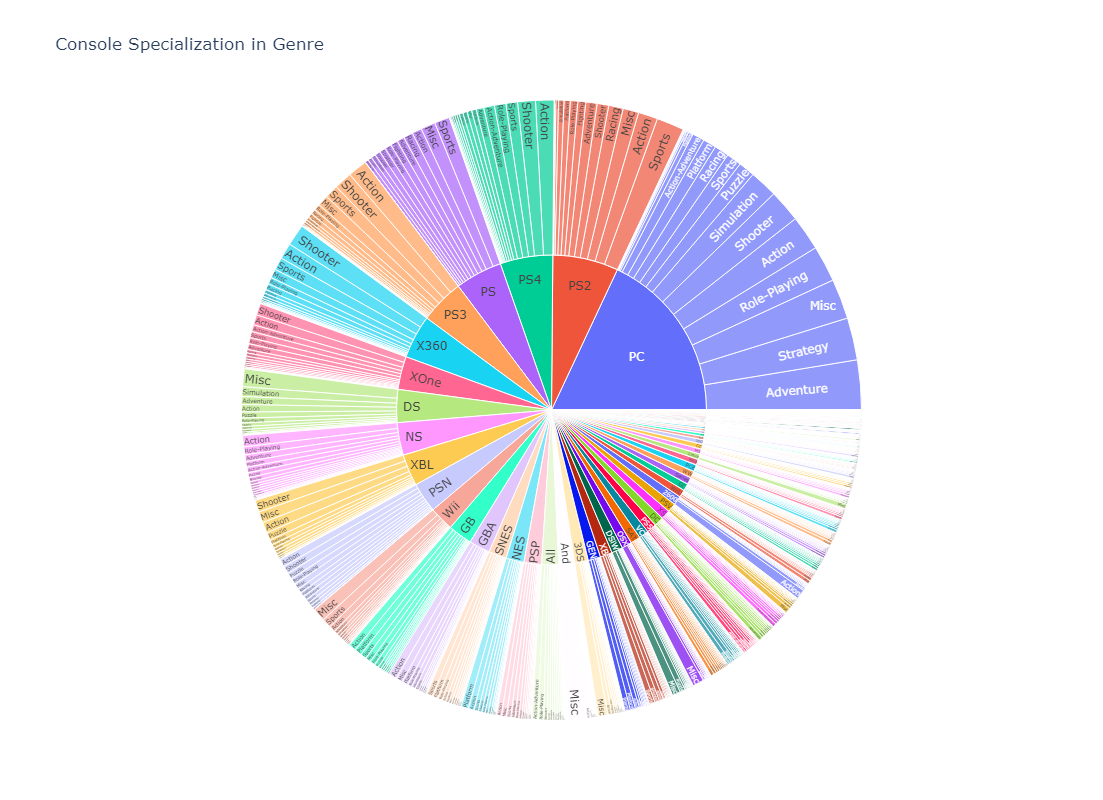

In [45]:
sales_by_consloeGenre = df.groupby(['console','genre'])['total_sales'].sum().reset_index()
sales_by_consloeGenre_sort = sales_by_consloeGenre.sort_values('total_sales',ascending=False)
px.sunburst(sales_by_consloeGenre_sort,path=['console','genre'],values='total_sales',title='Console Specialization in Genre',width=1000, height=800)

****Conclusion 3 : PC console do specilize in 'Adventure','Strategy' and 'Music'.****

#### 4. What titles are popular in one region but flop in another?

- na - North America<br>
- jp - Japan<br>
- PAL - Phase Alternating Line(include regions like Europe,New Zealand and some other countries)

In [46]:
df['na_ratio'] = df['na_sales']/df['total_sales']
df['jp_ratio'] = df['jp_sales']/df['total_sales']
df['pal_ratio'] = df['pal_sales']/df['total_sales']

##### 4.1 Titles that are popular in NA but flop in JP and PAL regions.

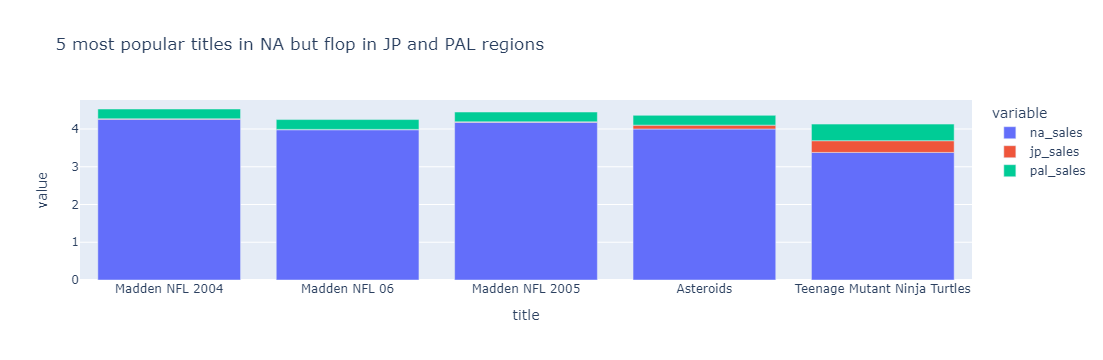

In [52]:
na_popular = df[(df.na_ratio > 0.8) & (df.jp_ratio < 0.2) & (df.pal_ratio < 0.2)]
px.bar(na_popular.head(5),x='title',y=['na_sales','jp_sales','pal_sales'],title='5 most popular titles in NA but flop in JP and PAL regions')

****Conclusion 4.1 : The titles 'Madden NFL 2004','Madden NFL 2005' and 'Madden NFL 06' are popular in NA but flop in 'JP' and 'PAL'.****

##### 4.2 Titles that are popular in JP but flop in NA and PAL regions.

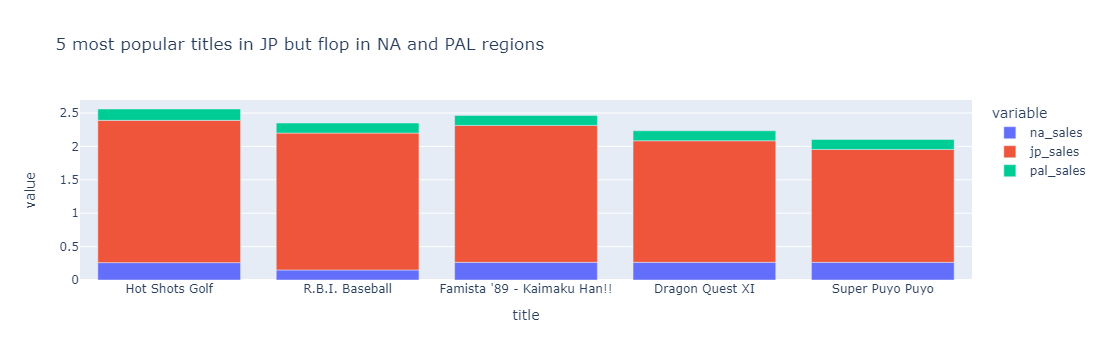

In [54]:
jp_popular = df[(df.na_ratio < 0.2) & (df.jp_ratio > 0.8) & (df.pal_ratio < 0.2)]
px.bar(jp_popular.head(5),x='title',y=['na_sales','jp_sales','pal_sales'],title='5 most popular titles in JP but flop in NA and PAL regions')

****Conclusion 4.2 : The titles 'Hot Shots Golf','R.B.I Baseball' and 'Famista '89' are popular in 'JP' but flop in 'NA' and 'PAL'.****

##### 4.3 Titles that are popular in PAL but flop in NA and JP regions.

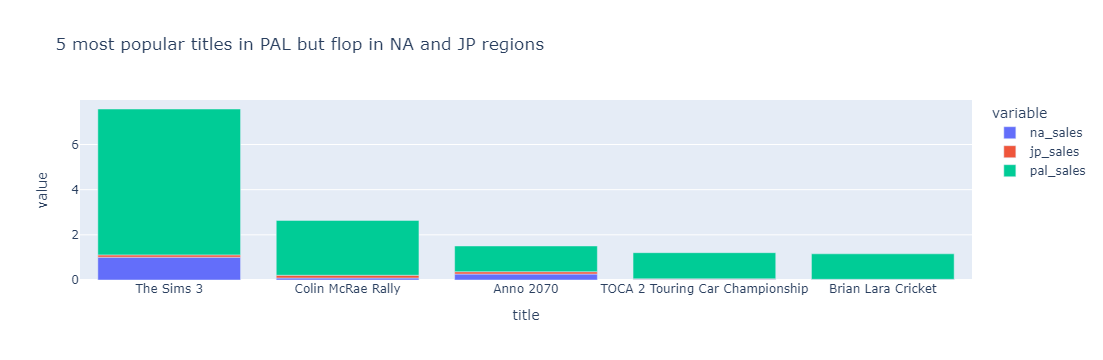

In [55]:
npl_popular = df[(df.na_ratio < 0.2) & (df.jp_ratio < 0.2) & (df.pal_ratio > 0.8)]
px.bar(npl_popular.head(5),x='title',y=['na_sales','jp_sales','pal_sales'],title='5 most popular titles in PAL but flop in NA and JP regions')

****Conclusion 4.3 : The titles 'The Sims 3','Colin McRae Rally' and 'Anno 2070' are popular in 'PAL' but flop in 'NA' and 'JP'.****

In [47]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year,na_ratio,jp_ratio,pal_ratio
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40000,20.32,6.37,0.99,9.85,3.12,2013-09-17,2019-04-21,2013,0.313484,0.048720,0.484744
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014,0.312532,0.030944,0.500774
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,2019-04-21,2002,0.520743,0.029102,0.339938
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.22044,15.86,9.06,0.06,5.33,1.42,2013-09-17,2019-04-21,2013,0.571248,0.003783,0.336066
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,2015,0.409543,0.027170,0.400928
